In [1]:
endpoint = 'https://synbiohub.org/sparql?'

query = '''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX sbh: <http://wiki.synbiohub.org/wiki/Terms/synbiohub#>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX sbol: <http://sbols.org/v2#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX purl: <http://purl.obolibrary.org/obo/>

select ?s ?o where {
?s a sbol:ComponentDefinition .
?s sbol:sequence ?seq .
?seq a sbol:Sequence .
?seq sbol:elements ?o .
}
'''

In [2]:
import requests
import urllib.parse

url = endpoint + urllib.parse.urlencode({'query': query})
print(url)
r = requests.get(url)

print(r.status_code)
print(r.encoding)
print(r.headers['content-type'])
print(r.content[0:1000])

f = open('response.xml', 'w')
f.write(r.content.decode('utf8'))

https://synbiohub.org/sparql?query=%0APREFIX+rdf%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%3E%0APREFIX+dcterms%3A+%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Fterms%2F%3E%0APREFIX+dc%3A+%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%3E%0APREFIX+sbh%3A+%3Chttp%3A%2F%2Fwiki.synbiohub.org%2Fwiki%2FTerms%2Fsynbiohub%23%3E%0APREFIX+prov%3A+%3Chttp%3A%2F%2Fwww.w3.org%2Fns%2Fprov%23%3E%0APREFIX+sbol%3A+%3Chttp%3A%2F%2Fsbols.org%2Fv2%23%3E%0APREFIX+xsd%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F2001%2FXMLSchema%23%3E%0APREFIX+rdfs%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F2000%2F01%2Frdf-schema%23%3E%0APREFIX+purl%3A+%3Chttp%3A%2F%2Fpurl.obolibrary.org%2Fobo%2F%3E%0A%0Aselect+%3Fs+%3Fo+where+%7B%0A%3Fs+a+sbol%3AComponentDefinition+.%0A%3Fs+sbol%3Asequence+%3Fseq+.%0A%3Fseq+a+sbol%3ASequence+.%0A%3Fseq+sbol%3Aelements+%3Fo+.%0A%7D%0A
200
utf-8
application/sparql-results+xml; charset=utf-8
b'<sparql xmlns="http://www.w3.org/2005/sparql-results#" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:s

65385932

In [1]:
f = open('response.xml', 'r')
content = f.read()

In [4]:
from xml.etree import ElementTree


def create_sequences(xml_content):
    sequences = {}
    
    ns = {'sparql_results': 'http://www.w3.org/2005/sparql-results#'}
    
    root = ElementTree.fromstring(xml_content)
    results = root.find('sparql_results:results', ns)

    for result in results.findall('sparql_results:result', ns):
        bindings = result.findall('sparql_results:binding', ns)

        for binding in bindings:
            if binding.attrib['name'] == 's':
                uri = binding.find('sparql_results:uri', ns).text

        for binding in bindings:
            if binding.attrib['name'] == 'o':
                sequence = binding.find('sparql_results:literal', ns).text

        sequences[uri] = sequence
    
    return sequences


sequences = create_sequences(content)

In [6]:
def write_fasta(sequences):
    f = open('synbiohub.fsa', 'w')
    
    for uri in sequences.keys():
        f.write('>%s\n' % uri)
        f.write('%s\n' % sequences[uri])
    
    f.close()
    
    
write_fasta(sequences)

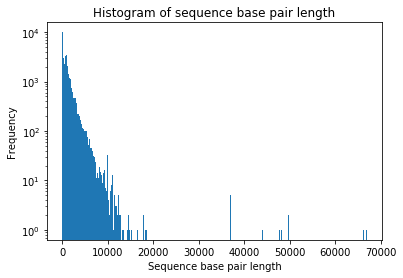

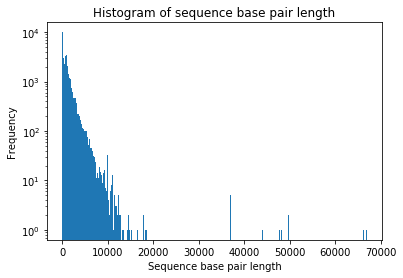

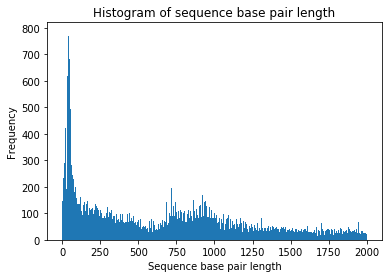

In [6]:
import matplotlib.pyplot as plt

def plot_sequence_lengths(sequences, logy=False, bins=500, cutoff=None, include_empty=True):
    base_lengths = []
    
    for uri in sequences.keys():
        length = len(sequences[uri])
        
        if not include_empty and length == 0:
            continue
        
        if cutoff is None or length < cutoff:
            base_lengths.append(length)
    
    plt.hist(base_lengths, bins)
    if logy:
        plt.yscale('log', nonposy='clip')
        
    _ = plt.title('Histogram of sequence base pair length')
    _ = plt.xlabel('Sequence base pair length')
    _ = plt.ylabel('Frequency')
    plt.show()

plot_sequence_lengths(sequences, logy=True, bins=500)
plot_sequence_lengths(sequences, logy=True, bins=500, include_empty=False)
plot_sequence_lengths(sequences, logy=False, bins=500, cutoff=2000)

In [14]:
def num_sequences_le_than(sequences, num):
    num_le_than = 0
    for uri in sequences.keys():
        if len(sequences[uri]) <= num:
            num_le_than += 1
    print(num_le_than, ' sequences less than or equal to ', num, ' out of ', len(sequences), ' sequences')

for i in range(100):
    num_sequences_le_than(sequences, i)

0  sequences less than or equal to  0  out of  48548  sequences
37  sequences less than or equal to  1  out of  48548  sequences
55  sequences less than or equal to  2  out of  48548  sequences
84  sequences less than or equal to  3  out of  48548  sequences
146  sequences less than or equal to  4  out of  48548  sequences
173  sequences less than or equal to  5  out of  48548  sequences
291  sequences less than or equal to  6  out of  48548  sequences
336  sequences less than or equal to  7  out of  48548  sequences
380  sequences less than or equal to  8  out of  48548  sequences
417  sequences less than or equal to  9  out of  48548  sequences
456  sequences less than or equal to  10  out of  48548  sequences
495  sequences less than or equal to  11  out of  48548  sequences
654  sequences less than or equal to  12  out of  48548  sequences
724  sequences less than or equal to  13  out of  48548  sequences
783  sequences less than or equal to  14  out of  48548  sequences
878  seque

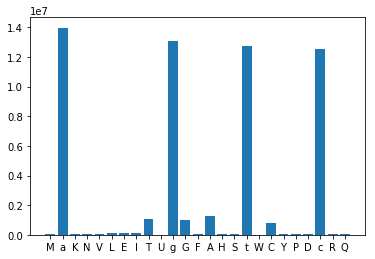

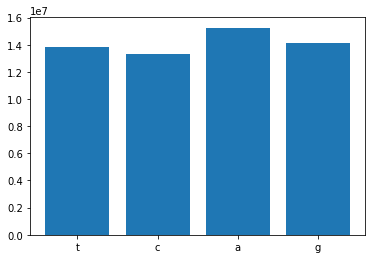

In [9]:
import matplotlib.pyplot as plt


def get_base_frequencies(sequences):
    base_frequencies = {}
    
    for uri, sequence in sequences.items():
        for base in sequence:
            if base not in base_frequencies:
                base_frequencies[base] = 0
            base_frequencies[base] += 1
    
    return base_frequencies


def plot_base_frequencies(base_frequencies):
    plt.bar(range(len(base_frequencies)), list(base_frequencies.values()), align='center')
    plt.xticks(range(len(base_frequencies)), list(base_frequencies.keys()))
    plt.show()

    
def normalize_sequences(sequences, approved_bases):
    for uri in sequences.keys():
        lowered = sequences[uri].lower()
        stripped = ''.join(c for c in lowered if c in approved_bases)
        sequences[uri] = stripped
        
    
base_frequencies = get_base_frequencies(sequences)
plot_base_frequencies(base_frequencies)

normalize_sequences(sequences, {'g', 'a', 't', 'c'})
base_frequencies = get_base_frequencies(sequences)
plot_base_frequencies(base_frequencies)